### Non-lInear classification

In [6]:
from sklearn.datasets import  make_circles
from matplotlib import  pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [60]:
X, Y = make_circles(n_samples=500,noise=0.002)

In [8]:
print(X.shape,Y.shape)

(500, 2) (500,)


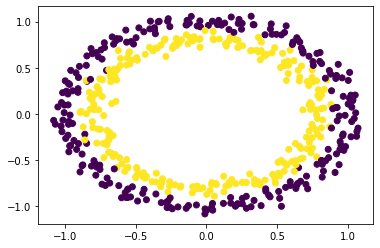

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [10]:
def phi(X):
    """ Apply Non-linear transformation  """
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    X_ = np.zeros((X.shape[0],3))

    X_[:,:-1] = X
    X_[:,-1] =X3

    return X_

In [11]:
X_ = phi(X)

In [12]:
X_.shape

(500, 3)

In [13]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if show == True:
        plt.show()
    return ax

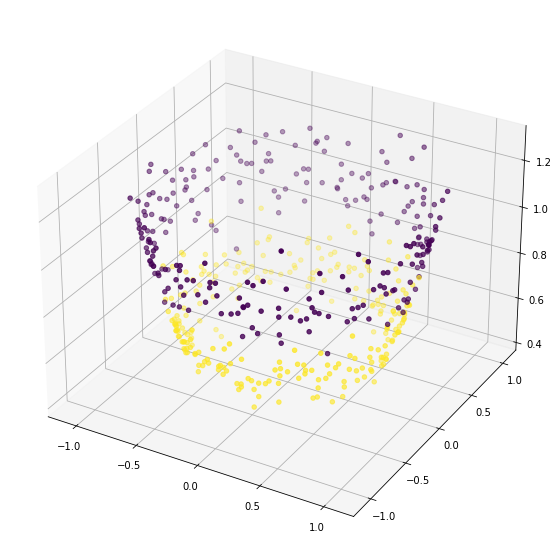

<Axes3DSubplot:>

In [14]:
plot3d(X_)

In [15]:
### Logistic classifier

In [16]:
from sklearn.linear_model import  LogisticRegression

In [17]:
from sklearn.model_selection import  cross_val_score

In [18]:
lr = LogisticRegression()

In [19]:
acc = cross_val_score(lr,X,Y,cv=5).mean()

In [20]:
print("Accuracy on Non linear data",acc*100)

Accuracy on Non linear data 43.8


In [21]:
acc2 = cross_val_score(lr,X_,Y,cv=5).mean()

In [22]:
print("Accuracy on Non linear data",acc2*100)

Accuracy on Non linear data 97.2


In [23]:
# Visualize the decision surface

In [24]:
lr.fit(X_,Y)

LogisticRegression()

In [25]:
W = lr.coef_

In [26]:
bias = lr.intercept_[0]

In [27]:
xx, yy = np.meshgrid(range(-2,2),range(-2,2))

In [28]:
z = -(W[0,0]*xx + W[0,1]*yy + bias)/W[0,2]

In [29]:
z

array([[0.82091038, 0.82236728, 0.82382418, 0.82528108],
       [0.82094246, 0.82239936, 0.82385626, 0.82531315],
       [0.82097454, 0.82243143, 0.82388833, 0.82534523],
       [0.82100661, 0.82246351, 0.82392041, 0.8253773 ]])

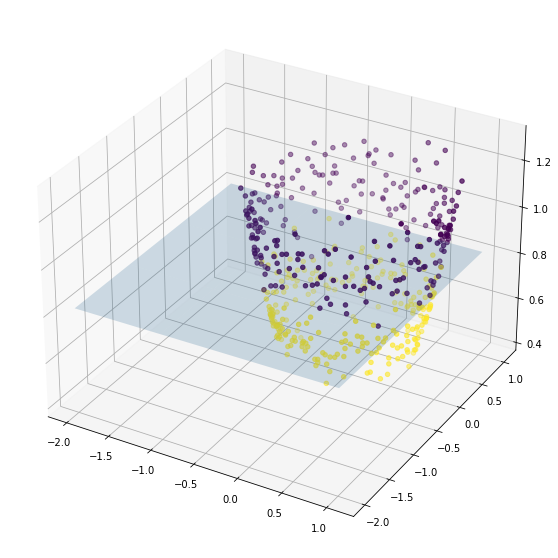

In [30]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

In [31]:
# ax.plot_surface?

## kernel based classification

In [32]:
from sklearn import  svm

In [55]:
svc = svm.SVC(kernel="rbf")

In [62]:
svc.fit(X,Y)

SVC()

In [63]:
svc.score(X,Y)*100

100.0

In [64]:
polsvc = svm.SVC(kernel='poly')

In [65]:
polsvc.fit(X,Y)
polsvc.score(X,Y)*100

54.0

### Custom Kernel


In [70]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1.T,x2))


In [71]:
svcc = svm.SVC(kernel=custom_kernel)

In [72]:
svcc.fit(X,Y)

SVC(kernel=<function custom_kernel at 0x7fe858f47430>)

In [73]:
svc.score(X,Y)

1.0